In [192]:
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [193]:
# Please modify these variables accordingly.

# Current year to be assumed. Since doordash does not provide this in their webpage.
current_year = 2023

# Class name of a date, price and quantity elem. This is just a text span.
class_name_of_date_price_quantity_elem = '.sc-20021cda-23.jfDVlS .styles__TextElement-sc-3qedjx-0.jPYUXx'

In [194]:
# Read the HTML file
# This should simply be a saved web page of orders history from doordash website.
with open('order.html', 'r', encoding='utf-8') as file:
    html = file.read()

In [195]:
# Parse HTML content with BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Select all elements with the specified class
order_elements = soup.select(class_name_of_date_price_quantity_elem)

In [196]:
# Initialize lists to store day, month, year, and cost data
days = []
months = []
years = []
costs = []

# Keep track of the previous month and year
prev_month = None
prev_year = None

# Loop through each order element
for order_element in order_elements:
    # Get the text content of the element
    order_text = order_element.get_text()

    # Use a regular expression to extract the date and price (assuming the format is consistent)
    date_match = re.search(r'(\w{3}, (\w{3}) (\d{1,2}))', order_text)
    price_match = re.search(r'\$([\d.]+)', order_text)

    # Check if both date and price matches were found
    if date_match and price_match:
        # Extract the matched day, month, and year
        day = int(date_match.group(3))
        month_str = date_match.group(2)
        month = datetime.strptime(month_str, '%b').strftime('%B')
        year = current_year

        # Check if the month is December and the previous month was not set
        if month == 'December' and prev_month == 'January':
            current_year = current_year - 1

        # Update the previous month and year
        prev_month = month

        # Append day, month, year, and cost to the lists
        days.append(day)
        months.append(month)
        years.append(year)
        costs.append(float(price_match.group(1)))

# Create a DataFrame from the lists
df = pd.DataFrame({'Day': days, 'Month': months, 'Year': years, 'Cost': costs})
df

,Day,Month,Year,Cost
0,20,December,2023,28.85
1,14,December,2023,20.58
2,11,December,2023,22.39
3,10,December,2023,20.69
4,8,December,2023,19.11
...,...,...,...,...
117,24,October,2022,28.84
118,13,October,2022,57.34
119,12,October,2022,17.39
120,12,October,2022,60.43


In [197]:
# Table with Yearly costs, 
df_yearly = df.groupby('Year')['Cost'].sum()
df_yearly

Year
2022     323.88
2023    2497.26
Name: Cost, dtype: float64

In [198]:
# Table with monthly cost this year.
df_monthly = df[df['Year'] == 2023]
df_monthly = df_monthly.groupby('Month')['Cost'].sum()
df_monthly

Month
April        119.68
August       540.97
December     192.61
February      88.19
January       56.62
July         372.89
June         180.23
March        156.28
May           41.73
November     241.08
October      235.05
September    271.93
Name: Cost, dtype: float64

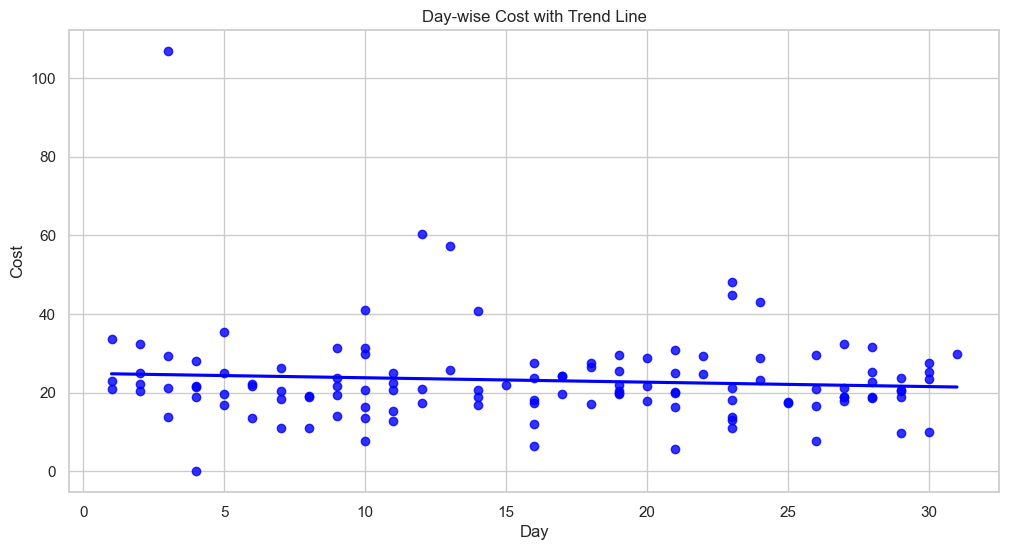

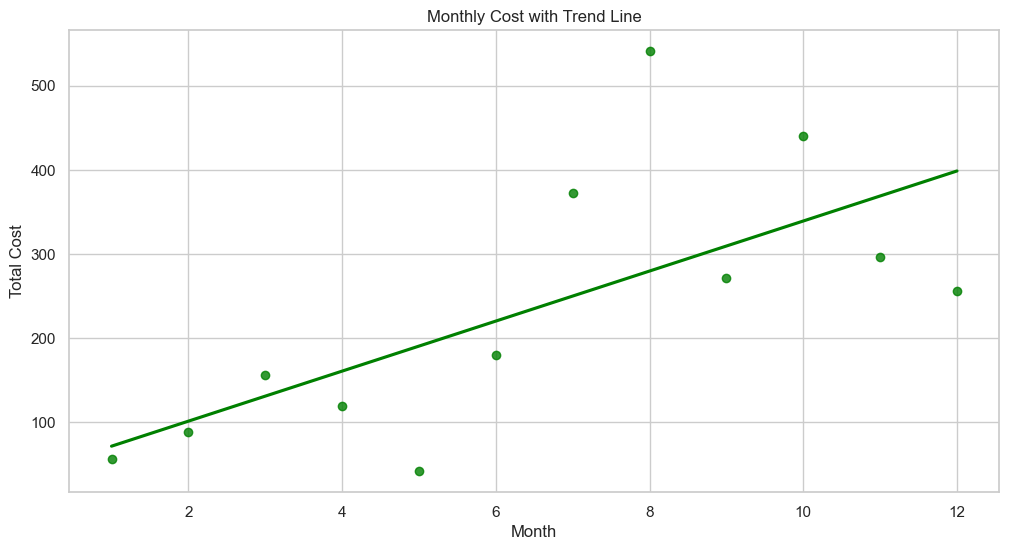

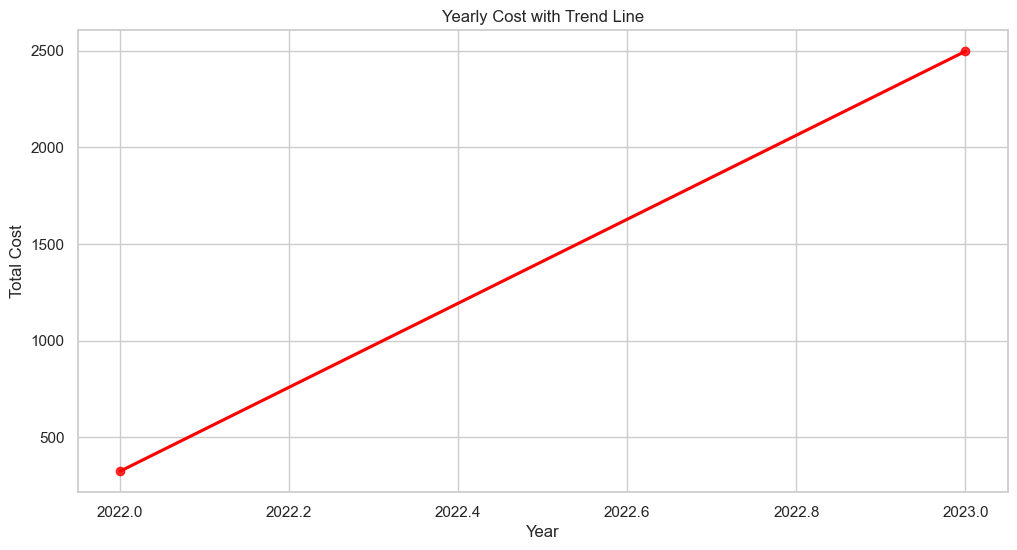

In [199]:
# Convert 'Month' to numeric representation
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
df['Month'] = df['Month'].cat.codes + 1  # Adding 1 to start months from 1

# Plot Day-wise costs with trend line
plt.figure(figsize=(12, 6))
sns.regplot(x='Day', y='Cost', data=df, scatter=True, ci=None, color='blue')
plt.title('Day-wise Cost with Trend Line')
plt.xlabel('Day')
plt.ylabel('Cost')
plt.show()

# Plot Monthly costs with trend line
plt.figure(figsize=(12, 6))
sns.regplot(x='Month', y='Cost', data=df.groupby('Month').sum().reset_index(), scatter=True, ci=None, color='green')
plt.title('Monthly Cost with Trend Line')
plt.xlabel('Month')
plt.ylabel('Total Cost')
plt.show()

# Plot Yearly costs with trend line
plt.figure(figsize=(12, 6))
sns.regplot(x='Year', y='Cost', data=df.groupby('Year').sum().reset_index(), scatter=True, ci=None, color='red')
plt.title('Yearly Cost with Trend Line')
plt.xlabel('Year')
plt.ylabel('Total Cost')
plt.show()
